1. How does the time of upload (status_published) affect the num_reactions?


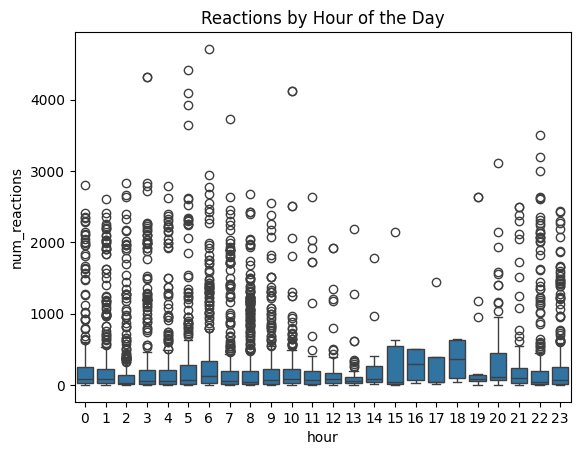

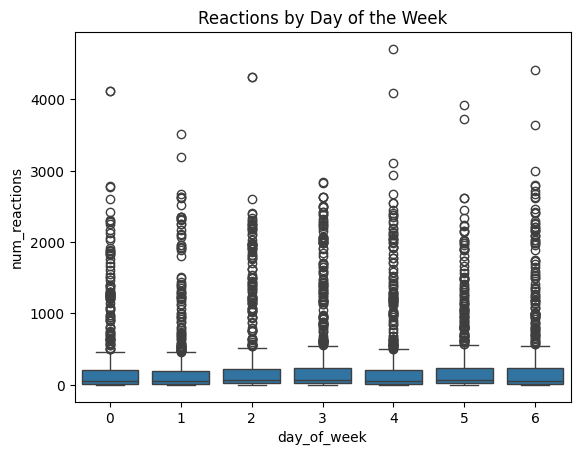

Correlation between hour and reactions: 0.017016198885973246


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df = pd.read_csv('Facebook_Marketplace_data.csv')
df['status_published'] = pd.to_datetime(df['status_published'])
df['hour'] = df['status_published'].dt.hour
df['day_of_week'] = df['status_published'].dt.dayofweek
df['month'] = df['status_published'].dt.month

# Boxplot of reactions by hour of the day
sns.boxplot(x='hour', y='num_reactions', data=df)
plt.title('Reactions by Hour of the Day')
plt.show()

# Boxplot of reactions by day of the week
sns.boxplot(x='day_of_week', y='num_reactions', data=df)
plt.title('Reactions by Day of the Week')
plt.show()

# Correlation between hour of the day and reactions
correlation, _ = pearsonr(df['hour'], df['num_reactions'])
print(f'Correlation between hour and reactions: {correlation}')



2. Is there a correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)? If so, what is the strength and direction of this correlation?

In [6]:
correlation_matrix = df[['num_reactions', 'num_comments', 'num_shares']].corr()
print(correlation_matrix)


               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


3. Use the columns status_type, num_reactions, num_comments, num_shares, num_likes, num_loves, num_wows, num_hahas, num_sads, and num_angrys to train a K-Means clustering model on the Facebook Live Sellers dataset.

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Select relevant columns
features = df[['status_type', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

# One-hot encode the 'status_type' column and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('status_type', OneHotEncoder(), ['status_type']),
        ('num_features', StandardScaler(), ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys'])
    ])

# Create a pipeline with preprocessing and KMeans
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Adjust n_clusters later
])

# Fit the model
pipeline.fit(features)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('status_type',
                                                  OneHotEncoder(),
                                                  ['status_type']),
                                                 ('num_features',
                                                  StandardScaler(),
                                                  ['num_reactions',
                                                   'num_comments', 'num_shares',
                                                   'num_likes', 'num_loves',
                                                   'num_wows', 'num_hahas',
                                                   'num_sads',
                                                   'num_angrys'])])),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

4. Use the elbow method to find the optimum number of clusters.

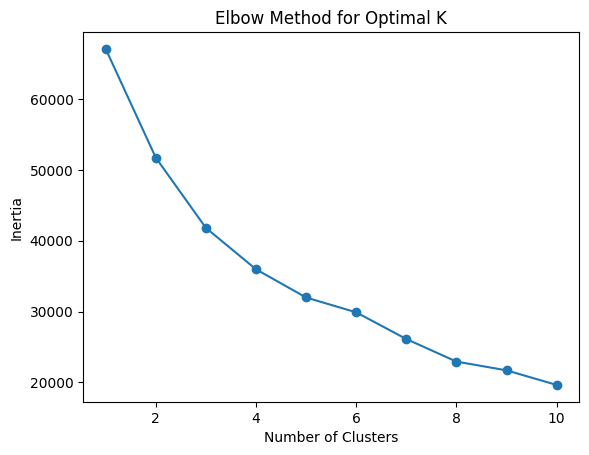

In [8]:
inertia = []
for k in range(1, 11):  # Test for k between 1 and 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(preprocessor.fit_transform(features))  # Preprocess and fit the data
    inertia.append(kmeans.inertia_)

# Plot the results
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


5. What is the count of different types of posts in the dataset?

In [9]:
post_type_counts = df['status_type'].value_counts()
print(post_type_counts)


status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


6. What is the average value of num_reactions, num_comments, num_shares for each post type?

In [10]:
avg_metrics = df.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()
print(avg_metrics)


             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949
